# Data processing and visualization project

## Review
Assessing the correct display of ratings on the online platform Fandango, which deals with ratings and reviews, also makes money from the sale of movie tickets.
Problem identification: Do these companies tend to over- or under-rate?


### Objective of the project:

**The goal of the project is to follow the steps based on the fivethirtyeight.com article about ratings and see if we can come to the same conclusions as in the article. It is necessary to determine whether Fandango provided inflated ratings in 2015 in order to sell more tickets.**

---

## Part 1: Exploring the data


**Read this article, based on which project is based:[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### Data

The source data for the article [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/) is freely available at the following github link: https://github.com /fivethirtyeight/data. These are two csv files. One file contains ratings data from Fandango, and the other file contains aggregated ratings data from other companies such as Metacritic, IMDB, and Rotten Tomatoes.

-----
#### all_sites_scores.csv
The `all_sites_scores.csv` file contains all movies that have a Rotten Tomatoes score, RT User score, Metacritic score, Metacritic User score, and IMDb score, as well as at least 30 fan reviews on Fandango. Fandango data was uploaded on August 24, 2015.

----

#### fandango_scape.csv
The film `fandango_scrape.csv` contains data about films that the authors of the article downloaded from Fandango.

Column | Definition
--- | ---------
FILM | Movie title
STARS | Number of stars on Fandango.com
RATING | Fandango rating is the value read from the HTML page. This is an average rating for the film.
VOTES | The number of votes of users who wrote a review about the film (at the time of data upload).

Column | Definition
--- | -----------
FILM | Movie title
RottenTomatoes | Rotten Tomatoes Tomatometer score for this film
RottenTomatoes_User | Rotten Tomatoes user rating for this movie
Metacritic | Metacritic score for this film
Metacritic_User | Metacritic user rating for this movie
IMDB | IMDb user rating for this movie
Metacritic_user_vote_count | Number of votes for this film from Metacritic users
IMDB_user_vote_count | Number of votes for this movie from IMDb users

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [33]:
all_site_scores = pd.read_csv('all_sites_scores.csv')
all_site_scores.head(4)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136


In [34]:
fandango_scrape = pd.read_csv('fandango_scrape.csv')
fandango_scrape.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [35]:
all_site_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


Let’s check how many null values we have in each data type

In [36]:
all_site_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [37]:
fandango_scrape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


Let’s check how many null values we have in each data type

In [38]:
fandango_scrape.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Exploring the relationship between a film’s popularity and its rating. Let’s draw a scatterplot to show the relationship between the RATING and VOTES columns

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

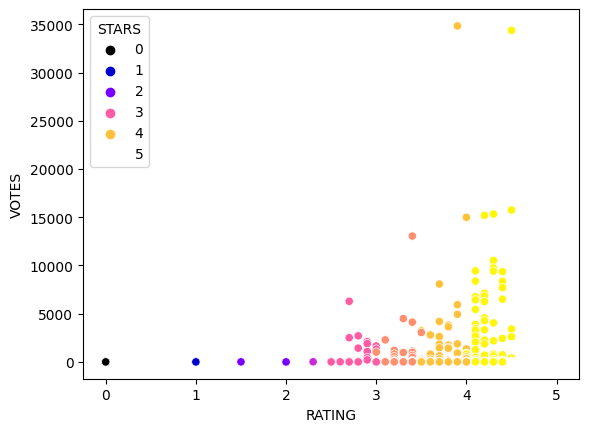

In [39]:
sns.scatterplot(data=fandango_scrape,
                x='RATING',
                y='VOTES',
                hue='STARS',
                palette='gnuplot2')

Calculation of correlation between columns

In [40]:
fandango_scrape.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Let’s create a column ‘YEAR’

In [41]:
fandango_scrape['YEAR'] = fandango_scrape['FILM'].apply(lambda x: int(x[-5:-1]))
fandango_scrape.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Number of movies in the Fandango dataset, by year

In [42]:
films_by_year = fandango_scrape['YEAR'].value_counts()
films_by_year

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

Let`s visualize the number of films per year using the countplot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

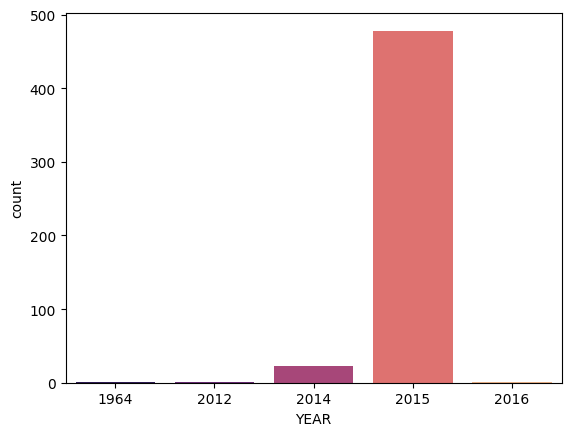

In [43]:
sns.countplot(data=fandango_scrape,
              x='YEAR',
              palette='magma')

Let’s look at the top 10 movies by the number of votes

In [44]:
fandango_scrape.nlargest(n=10, \
                         columns='VOTES', \
                         keep='first')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Let`s calculate how many films have zero votes

In [45]:
film_0_vote_count = fandango_scrape[fandango_scrape['VOTES'] == 0].shape[0]
film_0_vote_count

69

Let`s create a df with films have more than zero votes

In [46]:
film_not_0_vote_count = fandango_scrape[fandango_scrape['VOTES'] > 0]
film_not_0_vote_count.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Due to the way star ratings are displayed on HTML pages, actual user ratings may differ slightly from the ratings shown to the user. Let's visualize this difference in distributions.

Let's create a KDE plot (or several such plots) that displays the distribution of displayed ratings (STARS) and true ratings based on user votes (RATING). Trim the KDE range between 0-5.

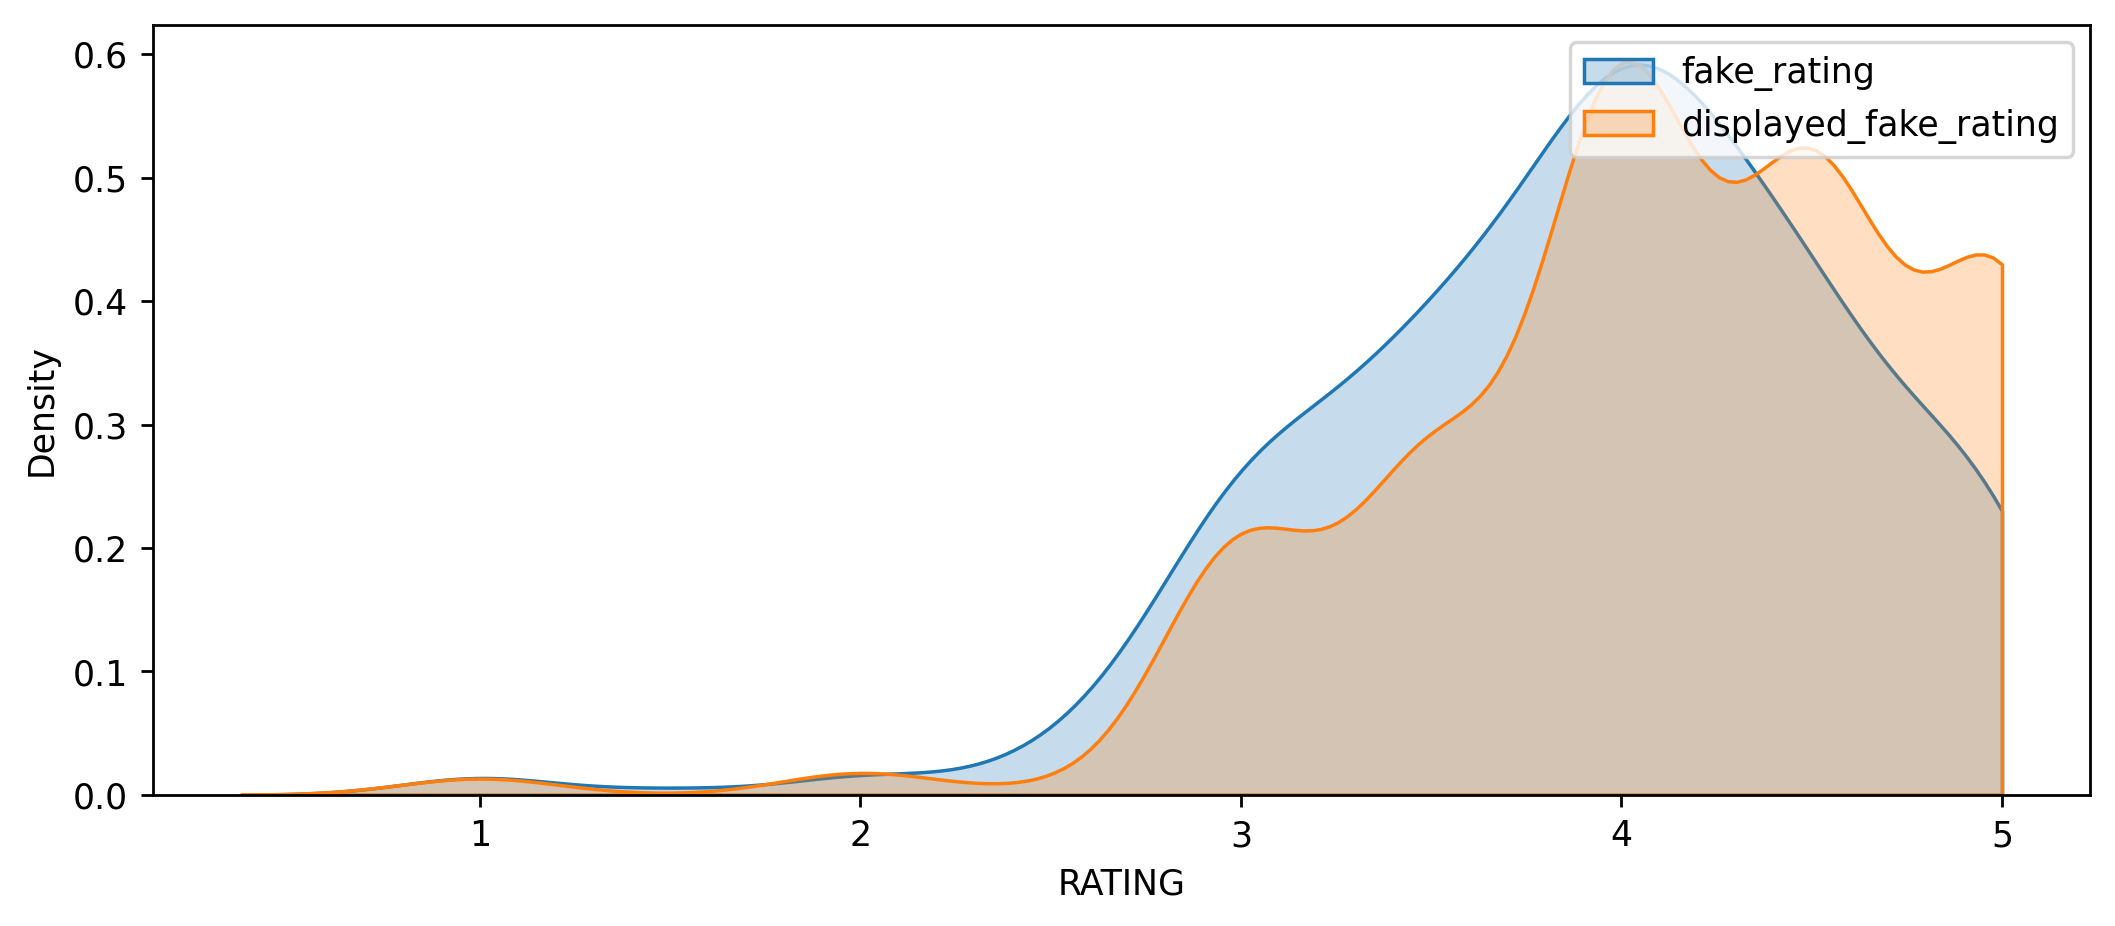

In [113]:
plt.figure(figsize=(10,4),
           dpi=250)


sns.kdeplot(data=film_not_0_vote_count,
            x='RATING',
            palette='magma',
            fill=True,
            label='fake_rating',
            clip=[0,5])

sns.kdeplot(data=film_not_0_vote_count,
            x='STARS',
            palette='magma',
            fill=True,
            label='displayed_fake_rating',
            clip=[0,5])

plt.legend()

Let’s take a look at the difference between ‘STARS’ and ‘RATING’

In [48]:
film_not_0_vote_count['DIFFERENCES'] = round(film_not_0_vote_count['STARS'] - film_not_0_vote_count['RATING'], 1)
film_not_0_vote_count.head()


C:\Users\super\AppData\Local\Temp\ipykernel_1476\663069680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_not_0_vote_count['DIFFERENCES'] = round(film_not_0_vote_count['STARS'] - film_not_0_vote_count['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCES
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


Let's draw a count plot to display how many times a particular value of the difference between STAR and RATING occurs

<AxesSubplot:xlabel='DIFFERENCES', ylabel='count'>

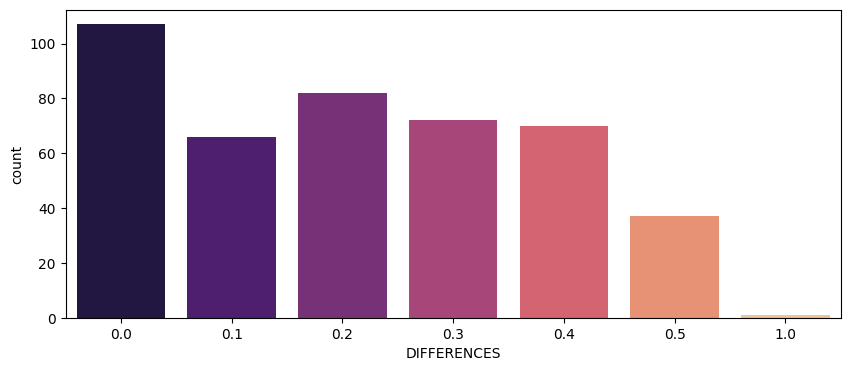

In [49]:
plt.figure(figsize=(10,4))

sns.countplot(data=film_not_0_vote_count,
              x='DIFFERENCES',
              palette='magma')


In this graph we can see that one of the movies has a 1 star difference between the displayed rating and the true rating! Find this movie.


In [50]:
diff_1 = film_not_0_vote_count[film_not_0_vote_count['DIFFERENCES'] == 1.0]
diff_1


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCES
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Let's take a look at how Fandango's ratings compare to those of other companies.

In [51]:
all_site_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [52]:
all_site_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [53]:
all_site_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Let's start with the Rotten Tomatoes ratings. There are two sets of ratings - ratings published by official critics and user ratings.

Let's create a scatterplot plotting the relationship between critic ratings and user ratings for Rotten Tomatoes.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

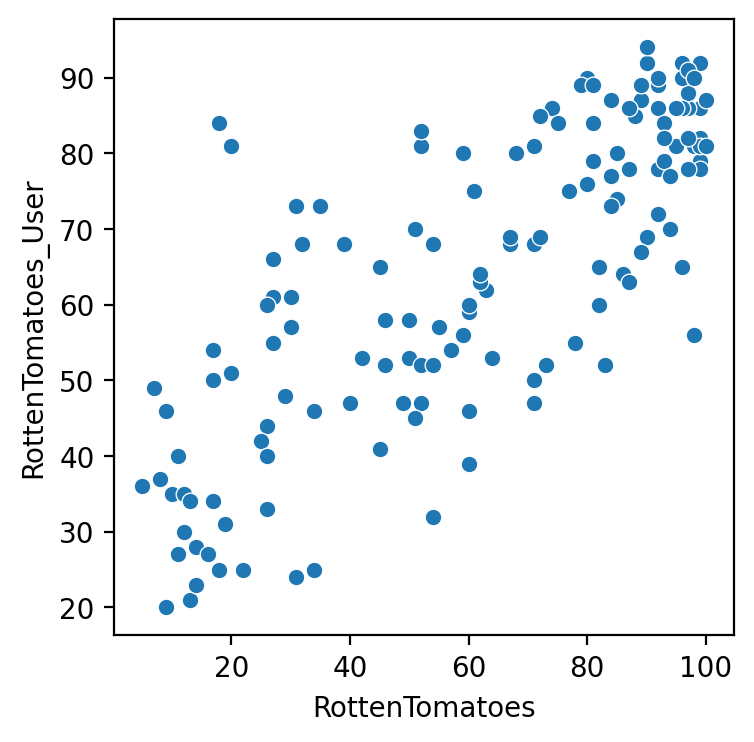

In [54]:
plt.figure(figsize=(4,4), 
           dpi=200)
sns.scatterplot(data=all_site_scores,
               x='RottenTomatoes',
               y='RottenTomatoes_User',
               palette = 'magma')

Let's examine the numerical difference between these two rankings. We will calculate this difference using the formula RottenTomatoes-RottenTomatoes_User. The resulting Rotten_Diff values are the critic rating minus the user rating. Values close to zero indicate that critics and users agree with each other. Large positive values - when critics rated the film much higher than users. And large negative values - on the contrary, users rated the film much higher than critics.

Let's create a new column that stores the difference between the critic rating and the user rating for Rotten Tomatoes. Use the formula RottenTomatoes-RottenTomatoes_User.

In [55]:
all_site_scores['Rotten_delta'] = all_site_scores['RottenTomatoes_User'] - all_site_scores['RottenTomatoes']
all_site_scores['Rotten_delta'].head()

0    12
1    -5
2    10
3    66
4    14
Name: Rotten_delta, dtype: int64

Now let's calculate the average of the resulting difference over the entire data set. Since the difference can be both positive and negative, let's first take the absolute values of all values, and only then calculate the average value. This will give us the average of the absolute difference between critic ratings and user ratings.

In [56]:
all_site_scores['Rotten_delta'].apply(lambda x: abs(x)).mean()

15.095890410958905

Let's graph the distribution of the difference between critic ratings and user ratings for Rotten Tomatoes. There will be negative values on this graph. You can use both KDE and histograms to display this distribution.

Text(0.5, 1.0, 'Rt_users - Rt_critics')

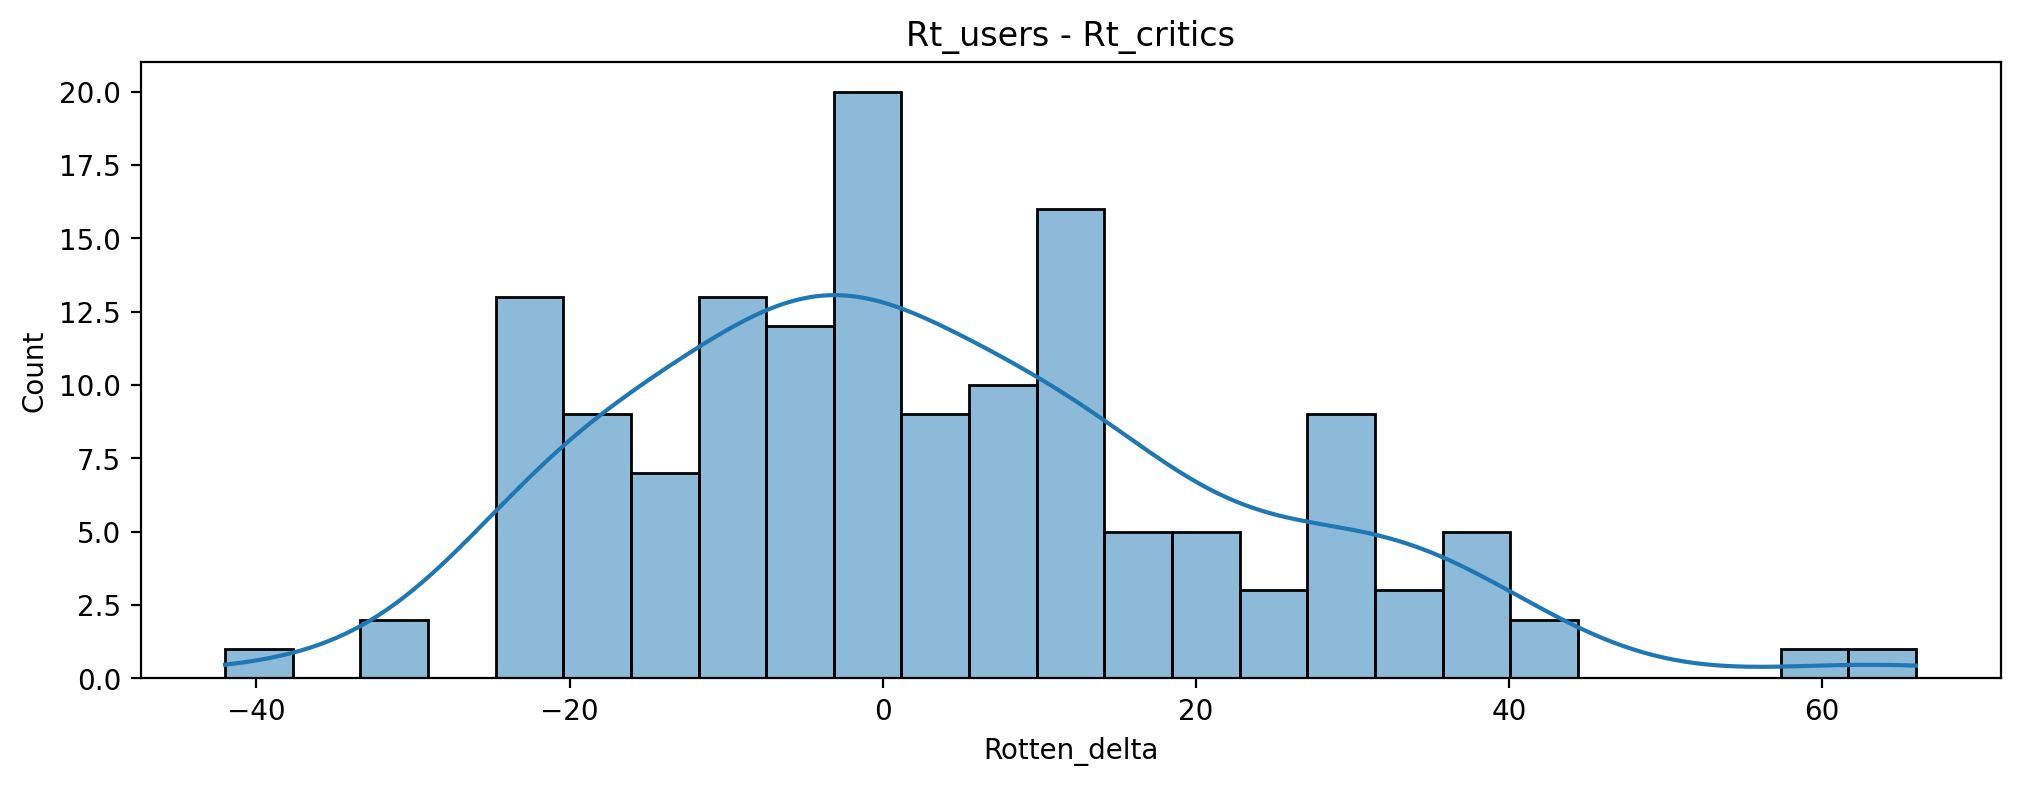

In [57]:
plt.figure(figsize=(12,4),
           dpi=200)
sns.histplot(data=all_site_scores,
             x='Rotten_delta',
             bins=25,
             kde=True) 
plt.title('Rt_users - Rt_critics')

Next, let's plot the distribution of the absolute values of the difference between critic ratings and user ratings for Rotten Tomatoes.

<AxesSubplot:xlabel='Rotten_delta', ylabel='Count'>

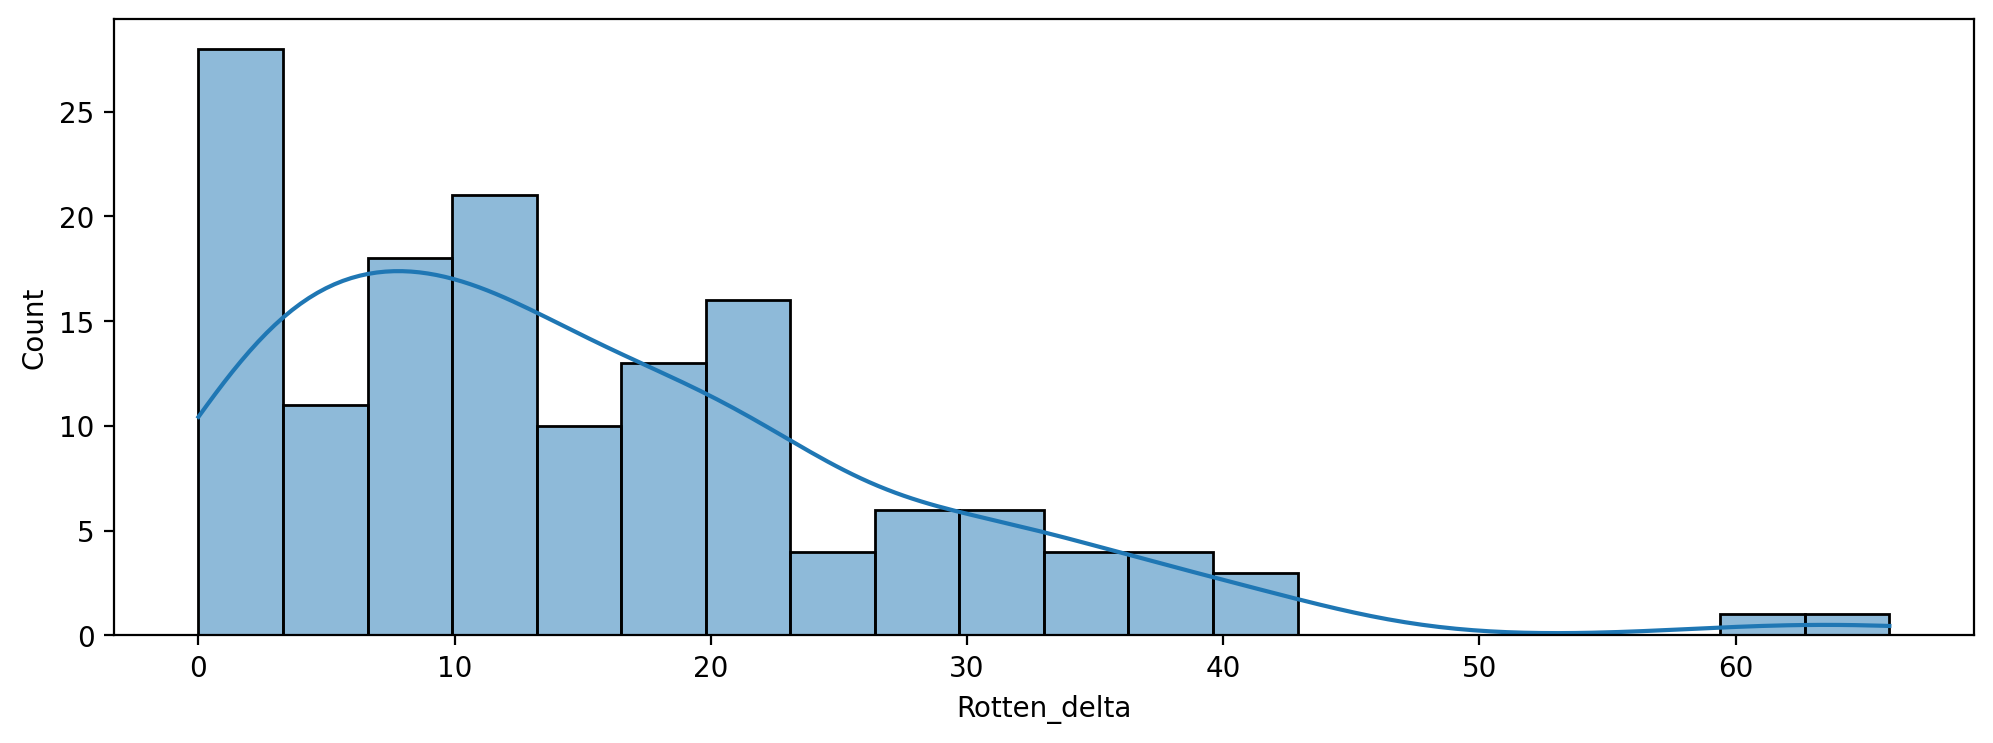

In [58]:
plt.figure(figsize=(12,4),
           dpi=200)
sns.histplot(data=all_site_scores,
             x=round(all_site_scores['Rotten_delta'].apply(lambda x: abs(x)), 0),
             bins=20,
             kde=True)

Let's find out which films differ the most in ratings. First, print 10 movies with the largest absolute negative difference in ratings. Since we calculated the difference in ratings using the Critics Rating - Users Rating formula, large negative values indicate that users, on average, rated these films much higher than critics.

The 10 films that were rated the highest by users on average compared to critics:

In [59]:
all_site_scores.nsmallest(10,'Rotten_delta')[['FILM','Rotten_delta']]

#TOP 10 user_negative

,FILM,Rotten_delta
69,Mr. Turner (2014),-42
112,It Follows (2015),-31
115,While We're Young (2015),-31
37,Welcome to Me (2015),-24
40,I'll See You In My Dreams (2015),-24
145,"Kumiko, The Treasure Hunter (2015)",-24
90,The SpongeBob Movie: Sponge Out of Water (2015),-23
7,Top Five (2014),-22
11,Black Sea (2015),-22
87,Maggie (2015),-22


Further, on the contrary, we will display 5 films that, on average, were rated highest by critics, compared to ratings from users.

In [60]:
all_site_scores.nlargest(10,'Rotten_delta')[['FILM','Rotten_delta']]

#TOP 10 user_positive

,FILM,Rotten_delta
3,Do You Believe? (2015),66
85,Little Boy (2015),61
105,Hitman: Agent 47 (2015),42
134,The Longest Ride (2015),42
125,The Wedding Ringer (2015),39
132,Max (2015),38
15,Taken 3 (2015),37
19,Pixels (2015),37
51,Entourage (2015),36
47,Annie (2014),34


Ratings from MetaCritic
Next, let's take a quick look at the ratings from MetaCritic. They also display two types of ratings - both their official ratings and user ratings.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

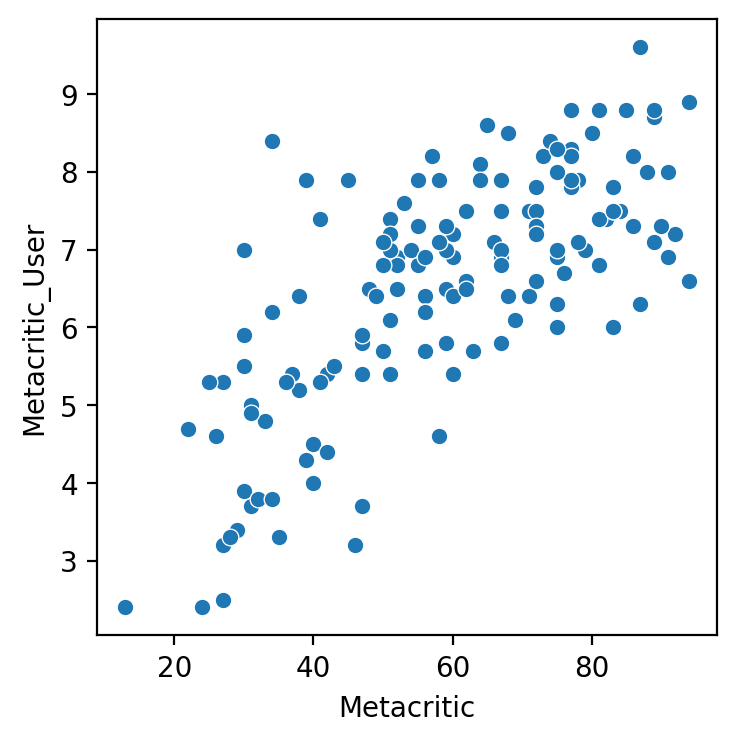

In [61]:
plt.figure(figsize=(4,4),
           dpi=200)
sns.scatterplot(data=all_site_scores,
               x='Metacritic',
               y='Metacritic_User')

Let’s equalize all metrics to have a common scale

In [62]:
all_site_scores['Metacritic_User_Scale'] = (all_site_scores['Metacritic_User'] * 10).astype(int)
all_site_scores['Metacritic_User_Scale'].head()

0    71
1    75
2    81
3    47
4    34
Name: Metacritic_User_Scale, dtype: int32

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User_Scale'>

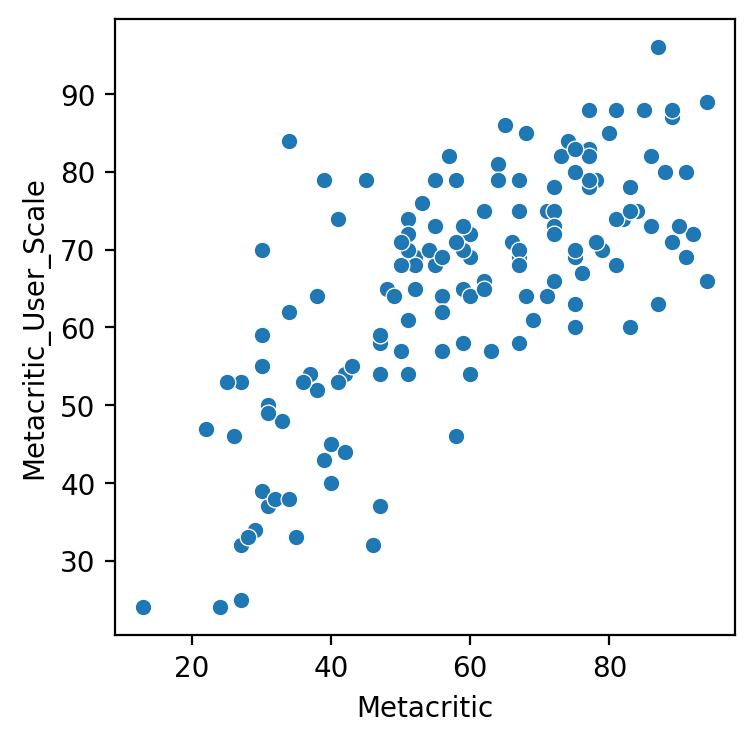

In [63]:
plt.figure(figsize=(4,4),
           dpi=200)
sns.scatterplot(data=all_site_scores,
               x='Metacritic',
               y='Metacritic_User_Scale')

In [64]:
#HW compare IMDB, Metacritic_Users and RT_Users

In [65]:
#HW compare MetaCritic and RT

Let's look at the ratings from RottenTomatoes. Please note that Metacritic and RottenTomatoes show the number of votes. Let's look at the most popular films.

Let's draw a scatterplot to depict the relationship between the number of votes on MetaCritic and the number of votes on RottenTomatoes.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='Metacritic'>

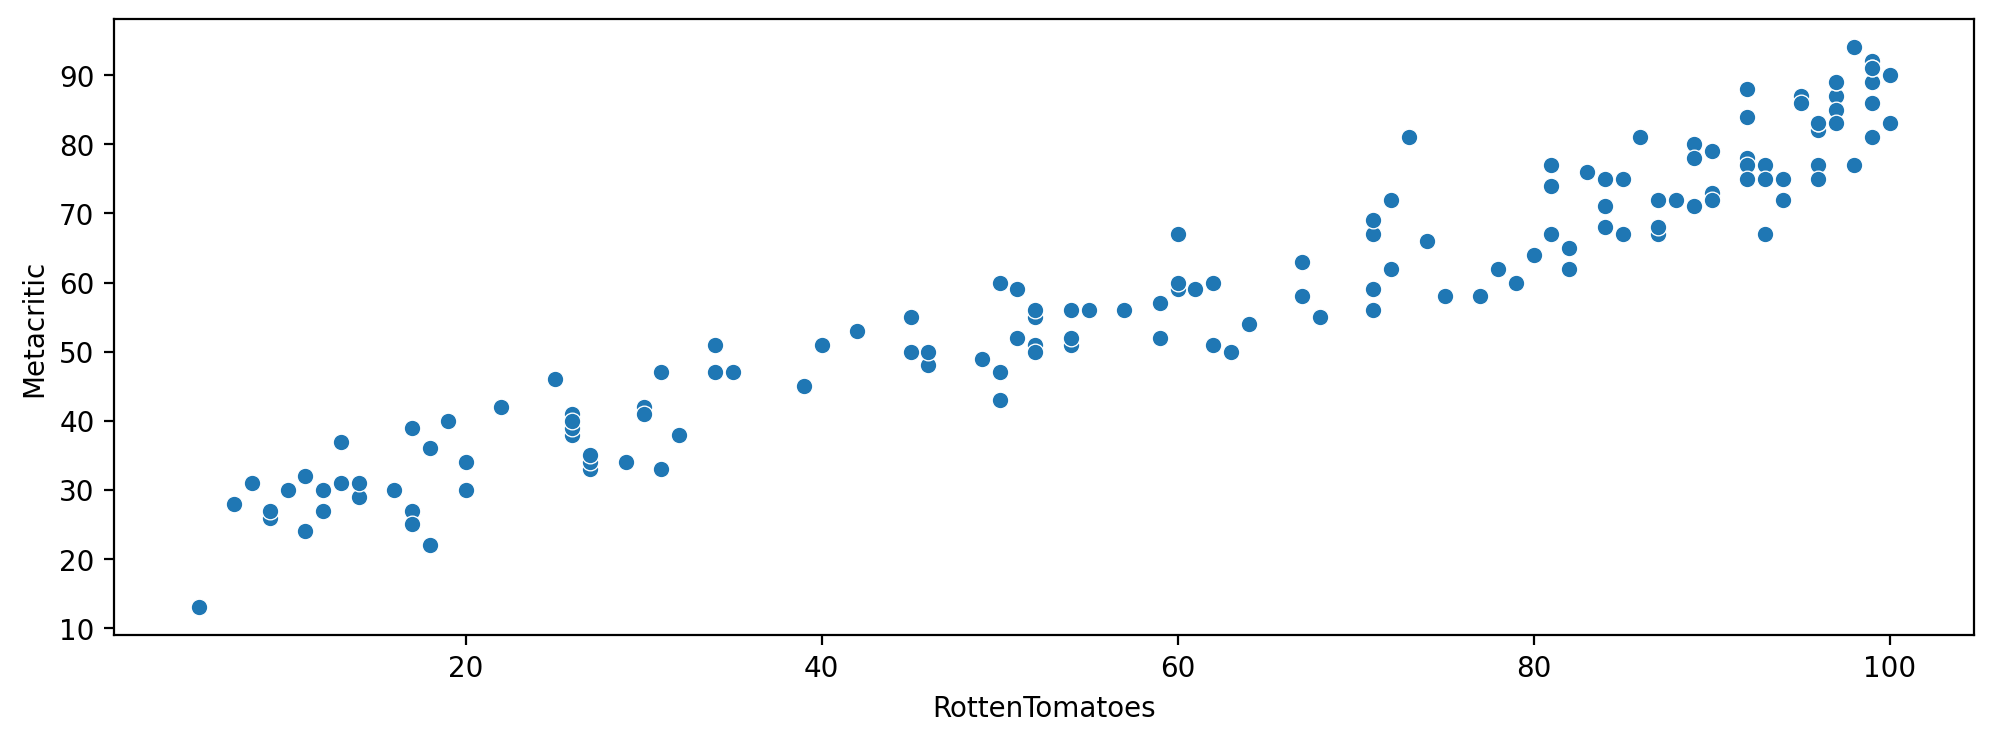

In [66]:
plt.figure(figsize = (12, 4), 
           dpi = 200)
sns.scatterplot(data = all_site_scores, 
                x = 'RottenTomatoes', 
                y = 'Metacritic')

<AxesSubplot:xlabel='IMDB_user_vote_count', ylabel='Metacritic_user_vote_count'>

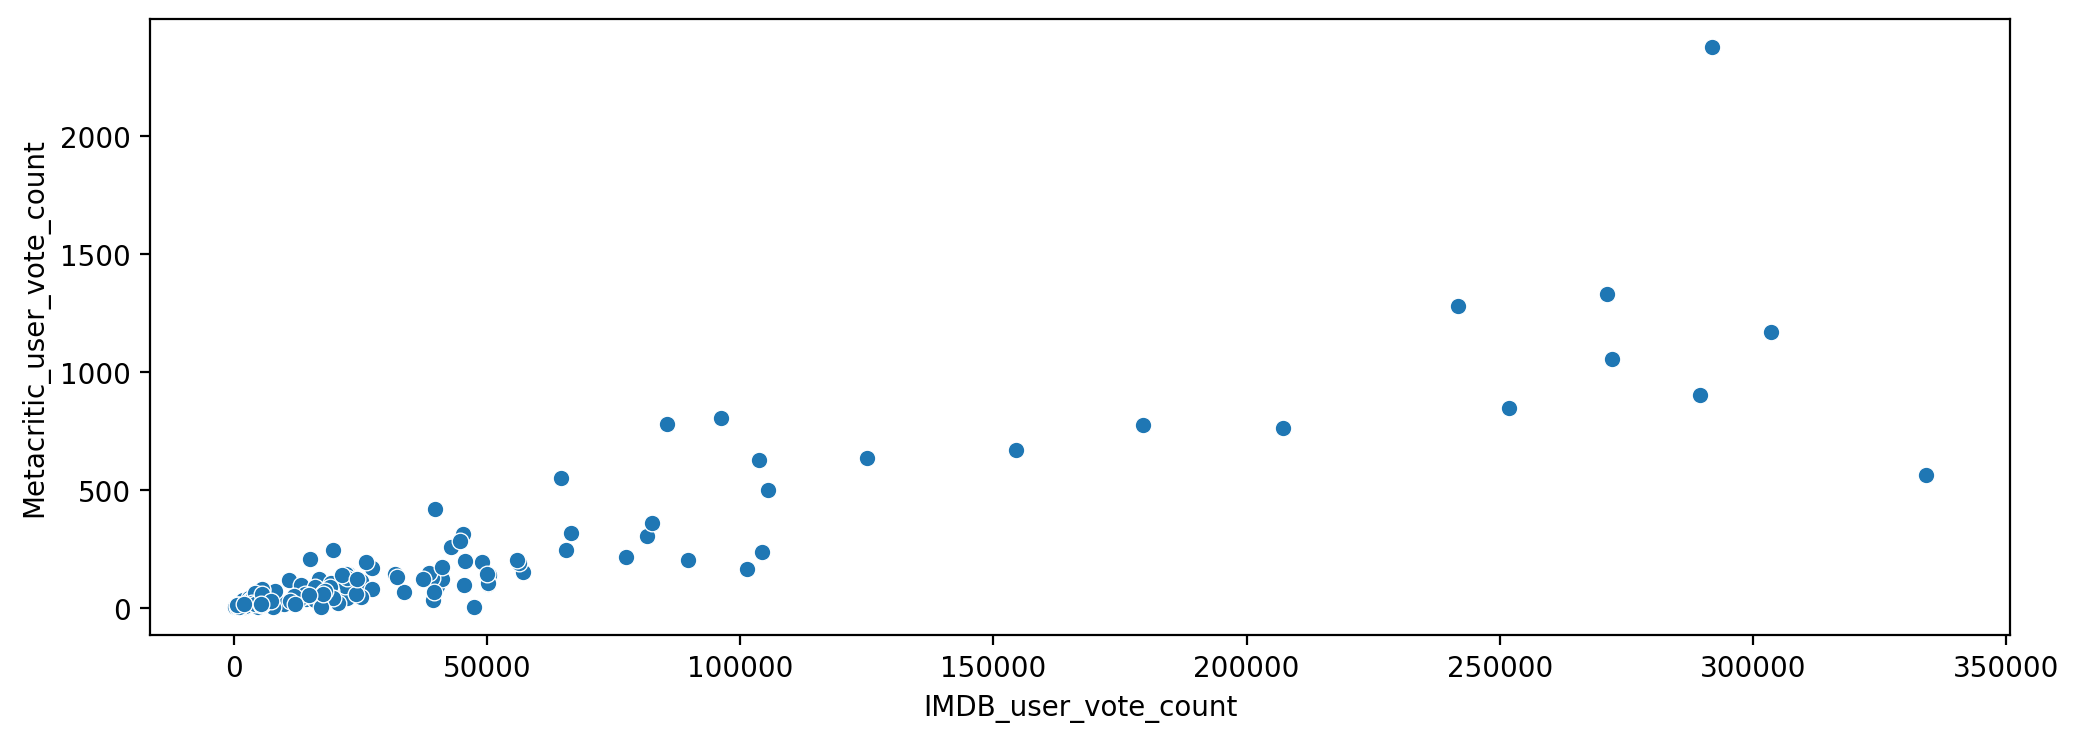

In [67]:
plt.figure(figsize=(12,4),
           dpi=200)
sns.scatterplot(data=all_site_scores,
                x='IMDB_user_vote_count',
                y='Metacritic_user_vote_count')

Find out which movie received the most votes on IMDB

In [68]:
all_site_scores[(all_site_scores['IMDB_user_vote_count'] > 300_000) & (all_site_scores['Metacritic_user_vote_count'] < 1000)]

#Popular for IMDB and not popular for MC

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_delta,Metacritic_User_Scale
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2,82


In [69]:
#Top_1_Metacritic_user_vote_count
all_site_scores.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_delta,Metacritic_User_Scale
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,-9,87


In [70]:
all_site_scores.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_delta,Metacritic_User_Scale
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12,71
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5,75
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10,81


In [71]:
fandango_scrape.head(3)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015


In [72]:
df = all_site_scores.merge(fandango_scrape,
                           how='inner',
                           on='FILM')
df.head()
                       

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_delta,Metacritic_User_Scale,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12,71,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5,75,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10,81,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66,47,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14,34,3.5,3.0,1021,2015


In [73]:
# df['RT_Norm'] = round(df['RottenTomatoes'] / 20, 1)
#Junior Level


In [79]:
#Mid_level
df[['RT_Norm','RT_User_Norm','Metacritic_Norm']] = df[['RottenTomatoes','RottenTomatoes_User','Metacritic']].apply(lambda x: round(x / 20, 1))
df[['Metacritic_User_Norm', 'IMDB_Norm']] = df[['Metacritic_User','IMDB']].apply(lambda x: round(x / 2, 1))

Let`s 
normalize these values so that they fall within the range of 0 to 5 stars.


In [81]:
#Senior level
# merge_df[['RT_Norm', 'RTU_Norm', 'Meta_Norm']] = np.vectorize(lambda x: round(x / 20, 1))(merge_df[['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic']])
# merge_df[['Meta_U_Norm', 'IMDB_Norm']] = np.vectorize(lambda x: round(x / 2, 1))(merge_df[['Metacritic_User', 'IMDB']])

In [80]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_delta,Metacritic_User_Scale,STARS,RATING,VOTES,YEAR,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12,71,5.0,4.5,14846,2015,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5,75,5.0,4.5,12640,2015,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10,81,5.0,4.5,12055,2015,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66,47,5.0,4.5,1793,2015,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14,34,3.5,3.0,1021,2015,0.7,1.4,1.4,1.7,2.6


In [103]:
norm_scores = df[['STARS','RATING', 'RT_Norm', 'RT_User_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm']]

norm_scores.head()

,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


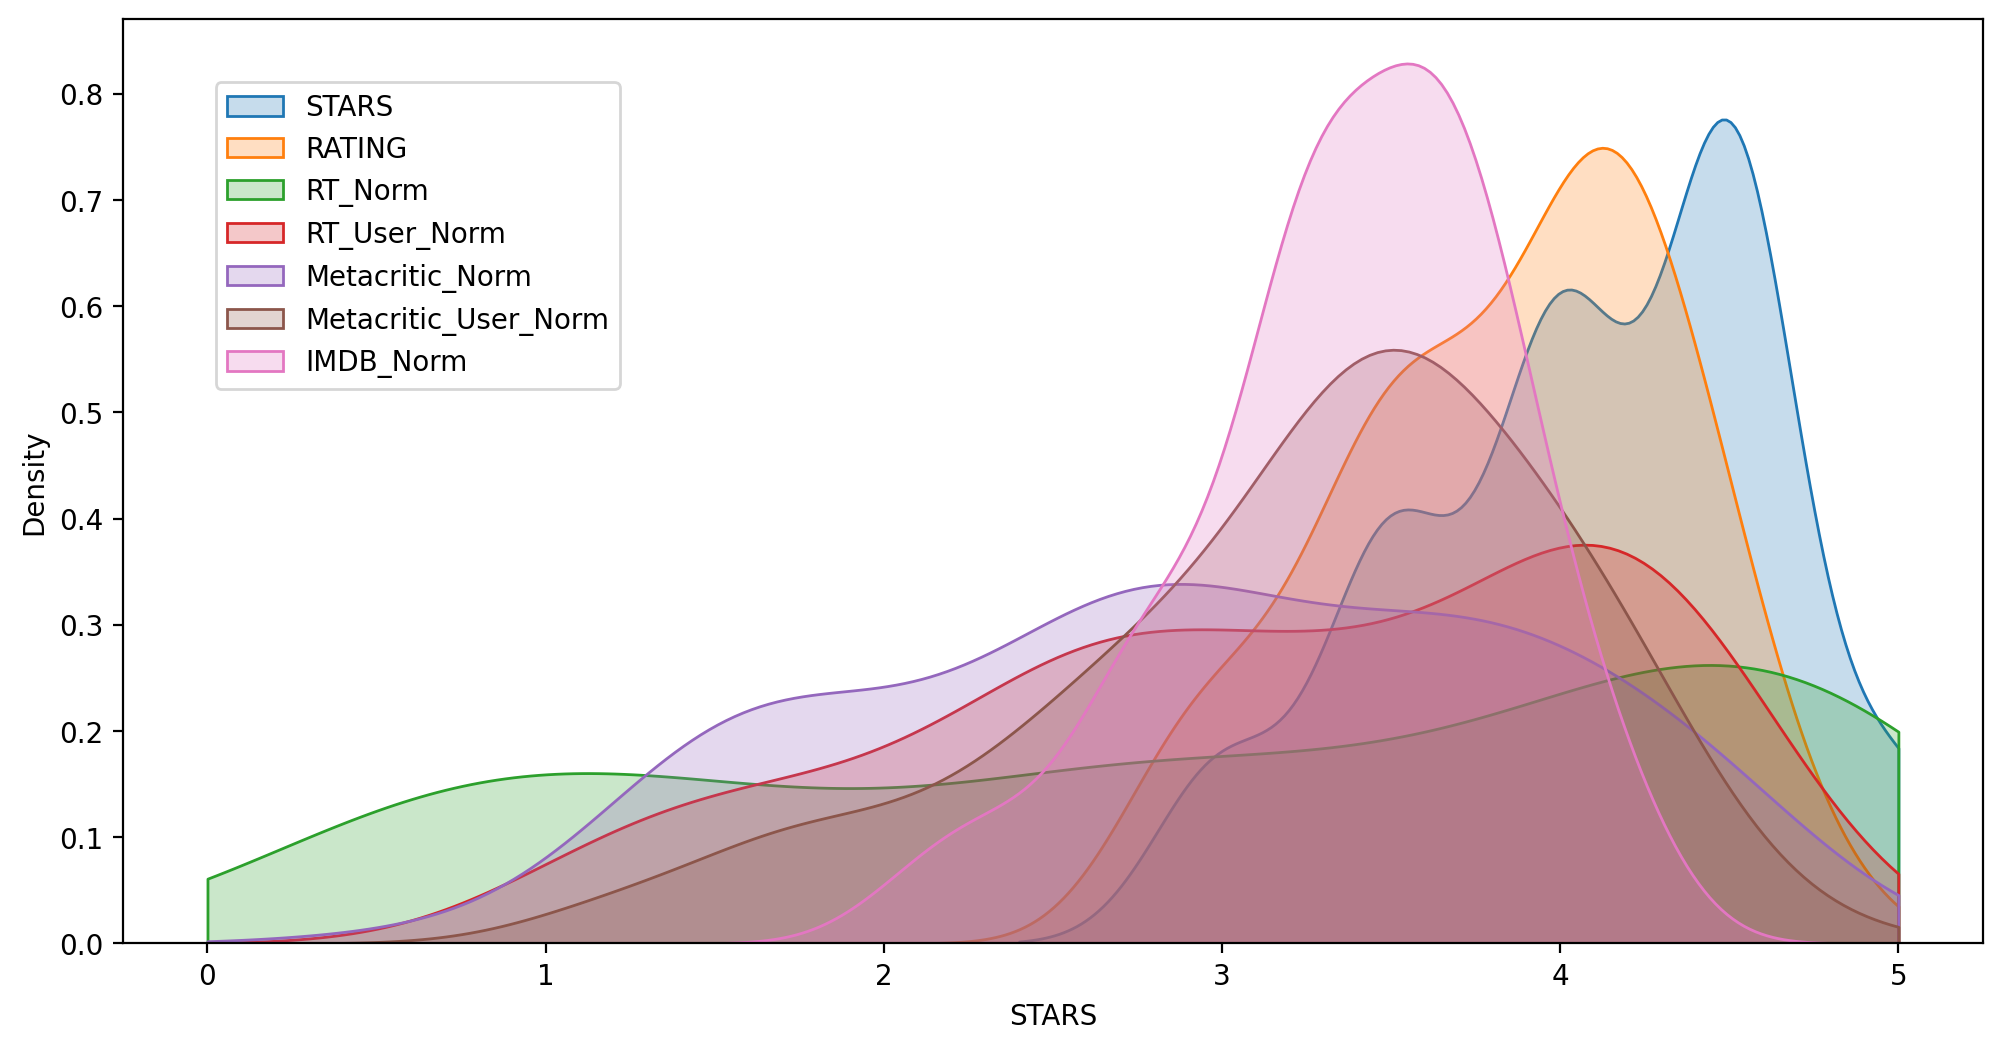

In [104]:
plt.figure(figsize=(12,6),
           dpi=200)
sns.kdeplot(data=norm_scores, x='STARS', clip=[0,5], palette='crest', fill=True, label='STARS')
sns.kdeplot(data=norm_scores, x='RATING', clip=[0,5], palette='crest', fill=True, label='RATING')
sns.kdeplot(data=norm_scores, x='RT_Norm', clip=[0,5], palette='crest', fill=True, label='RT_Norm')
sns.kdeplot(data=norm_scores, x='RT_User_Norm', clip=[0,5], palette='crest', fill=True, label='RT_User_Norm')
sns.kdeplot(data=norm_scores, x='Metacritic_Norm', clip=[0,5], palette='crest', fill=True, label='Metacritic_Norm')
sns.kdeplot(data=norm_scores, x='Metacritic_User_Norm', clip=[0,5], palette='crest', fill=True, label='Metacritic_User_Norm')
sns.kdeplot(data=norm_scores, x='IMDB_Norm', clip=[0,5], palette='crest', fill=True, label='IMDB_Norm')
plt.legend(loc=(0.05, 0.6))

<AxesSubplot:ylabel='Density'>

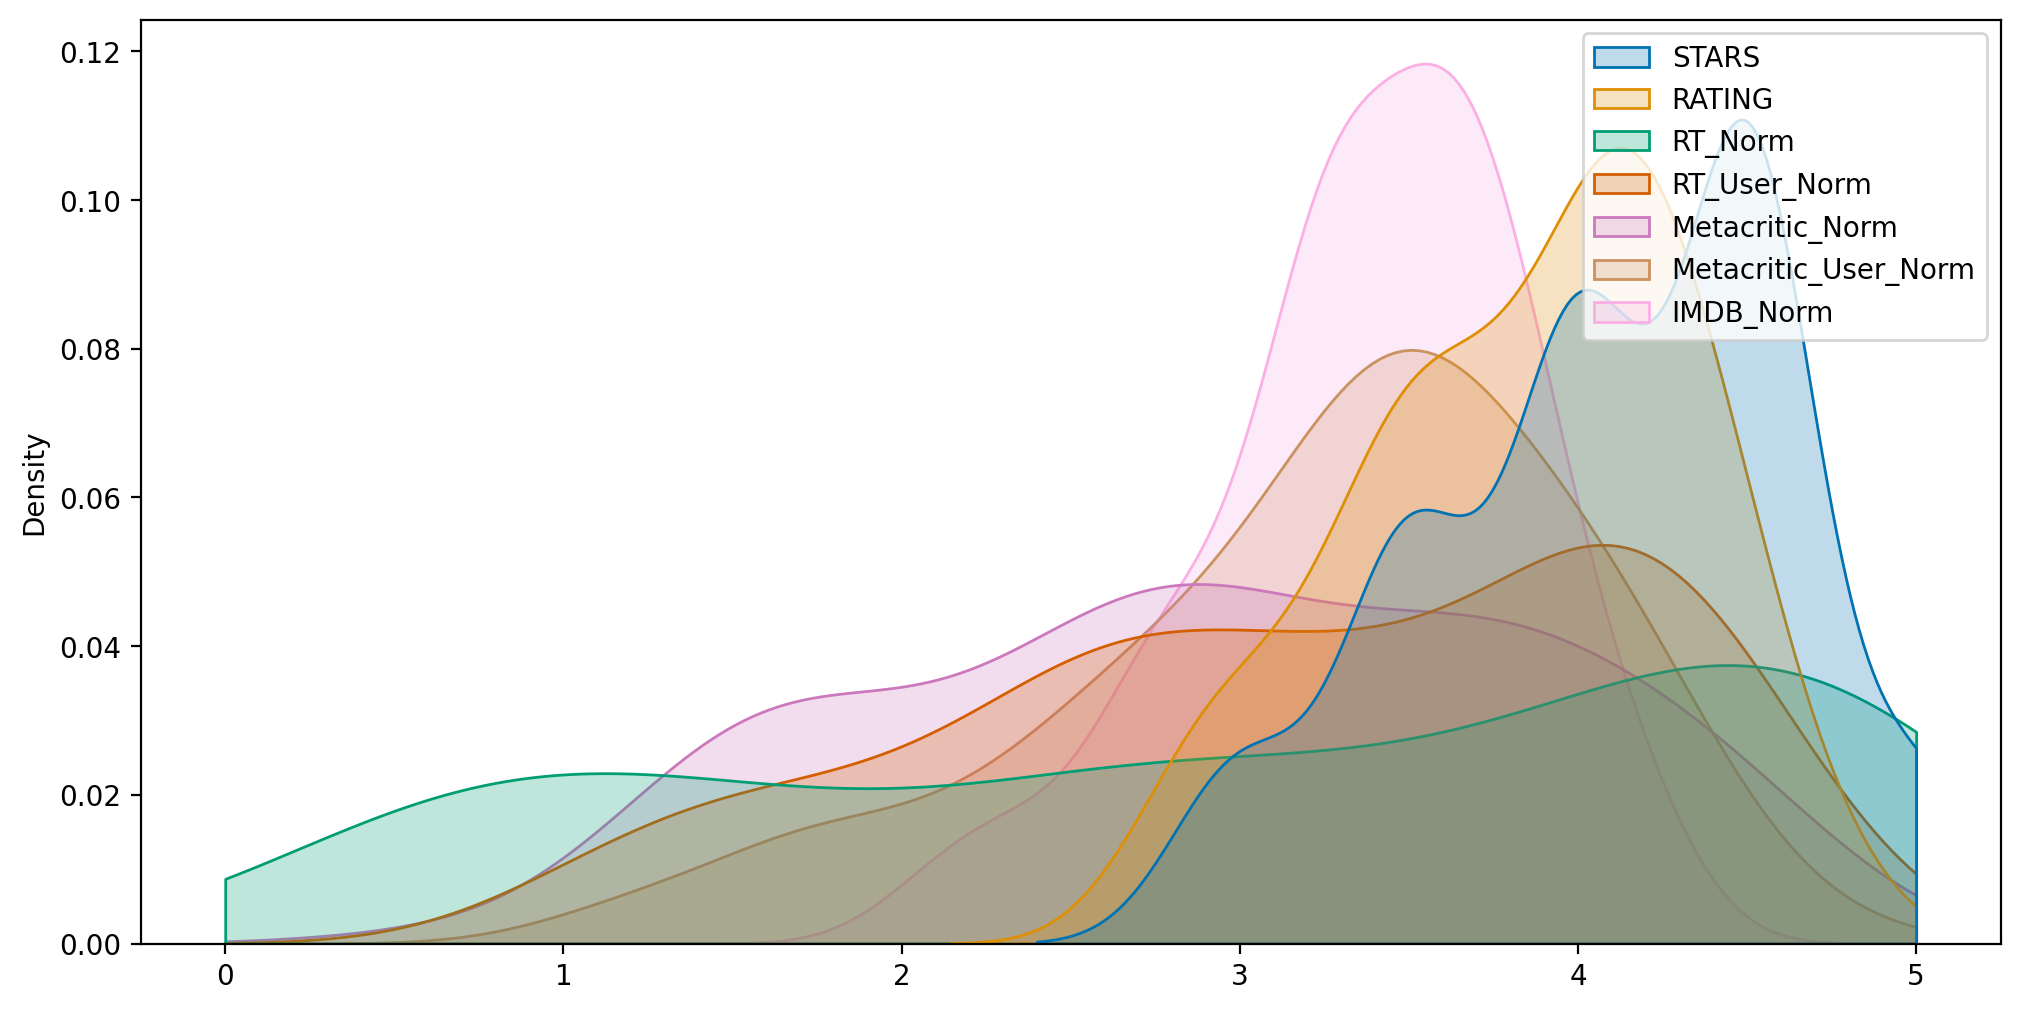

In [105]:
plt.figure(figsize=(12,6),
           dpi=200)
sns.kdeplot(data=norm_scores, clip=[0,5], palette='colorblind', fill=True)

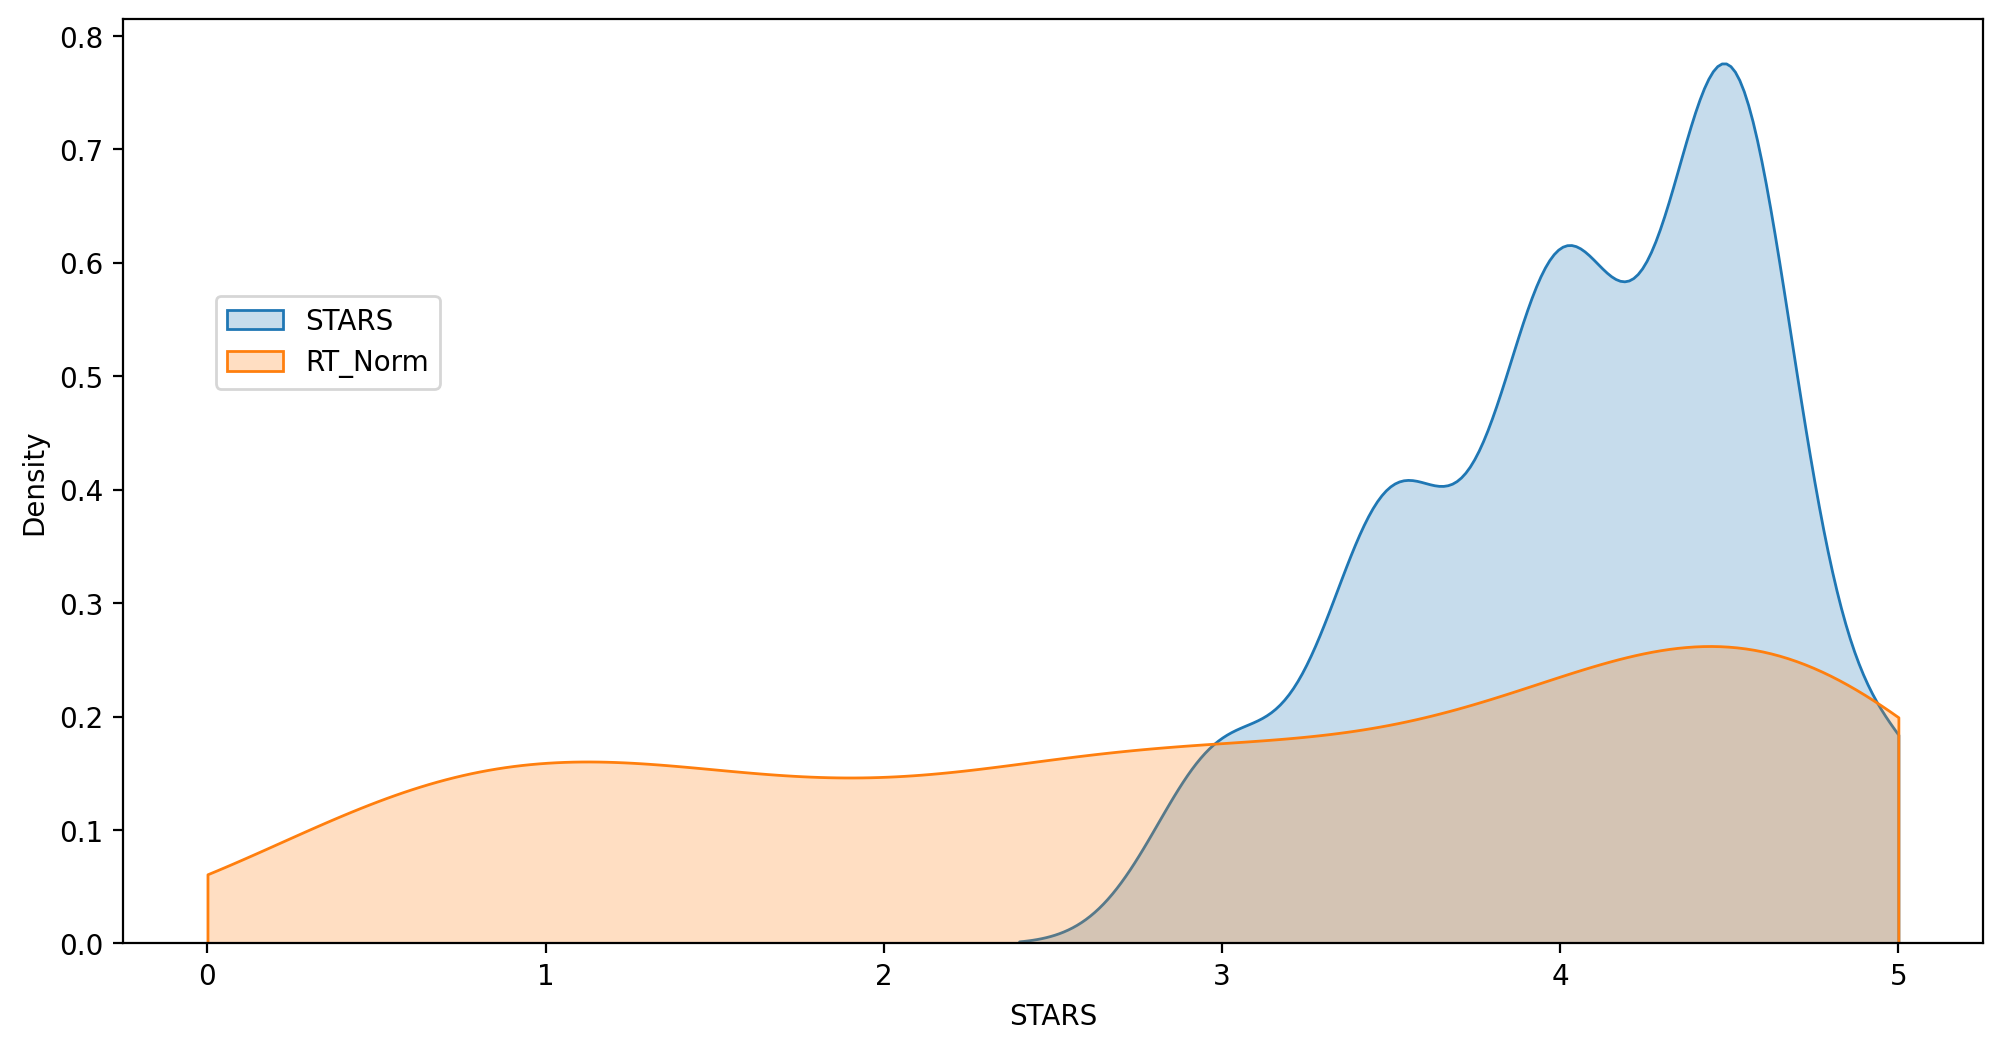

In [106]:
plt.figure(figsize=(12,6),
           dpi=200)
sns.kdeplot(data=norm_scores, x='STARS', clip=[0,5], palette='crest', fill=True, label='STARS')
sns.kdeplot(data=norm_scores, x='RT_Norm', clip=[0,5], palette='crest', fill=True, label='RT_Norm')
plt.legend(loc=(0.05, 0.6))

<AxesSubplot:ylabel='Count'>

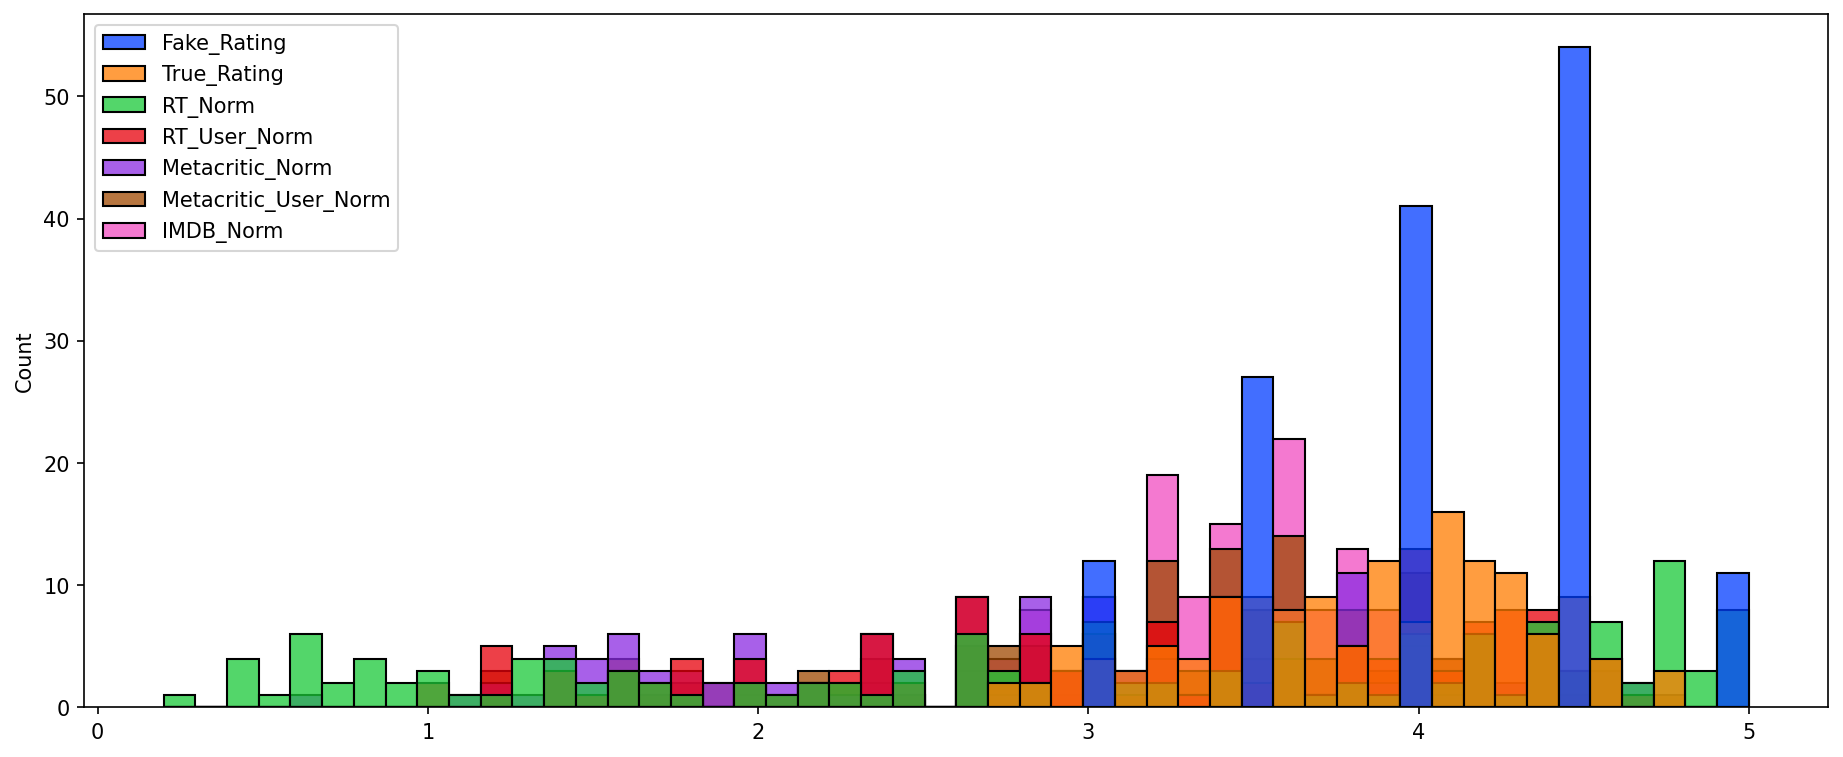

In [95]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50, palette = 'bright')

In [107]:
norm_films = df[['FILM','STARS','RATING', 'RT_Norm', 'RT_User_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm']]
norm_films.nsmallest(10, 'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
132,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
15,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
48,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
53,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
105,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
33,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
35,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
58,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
59,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
60,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


Text(0.5, 1.0, 'Rating_for_RT_critics_10_worst_films')

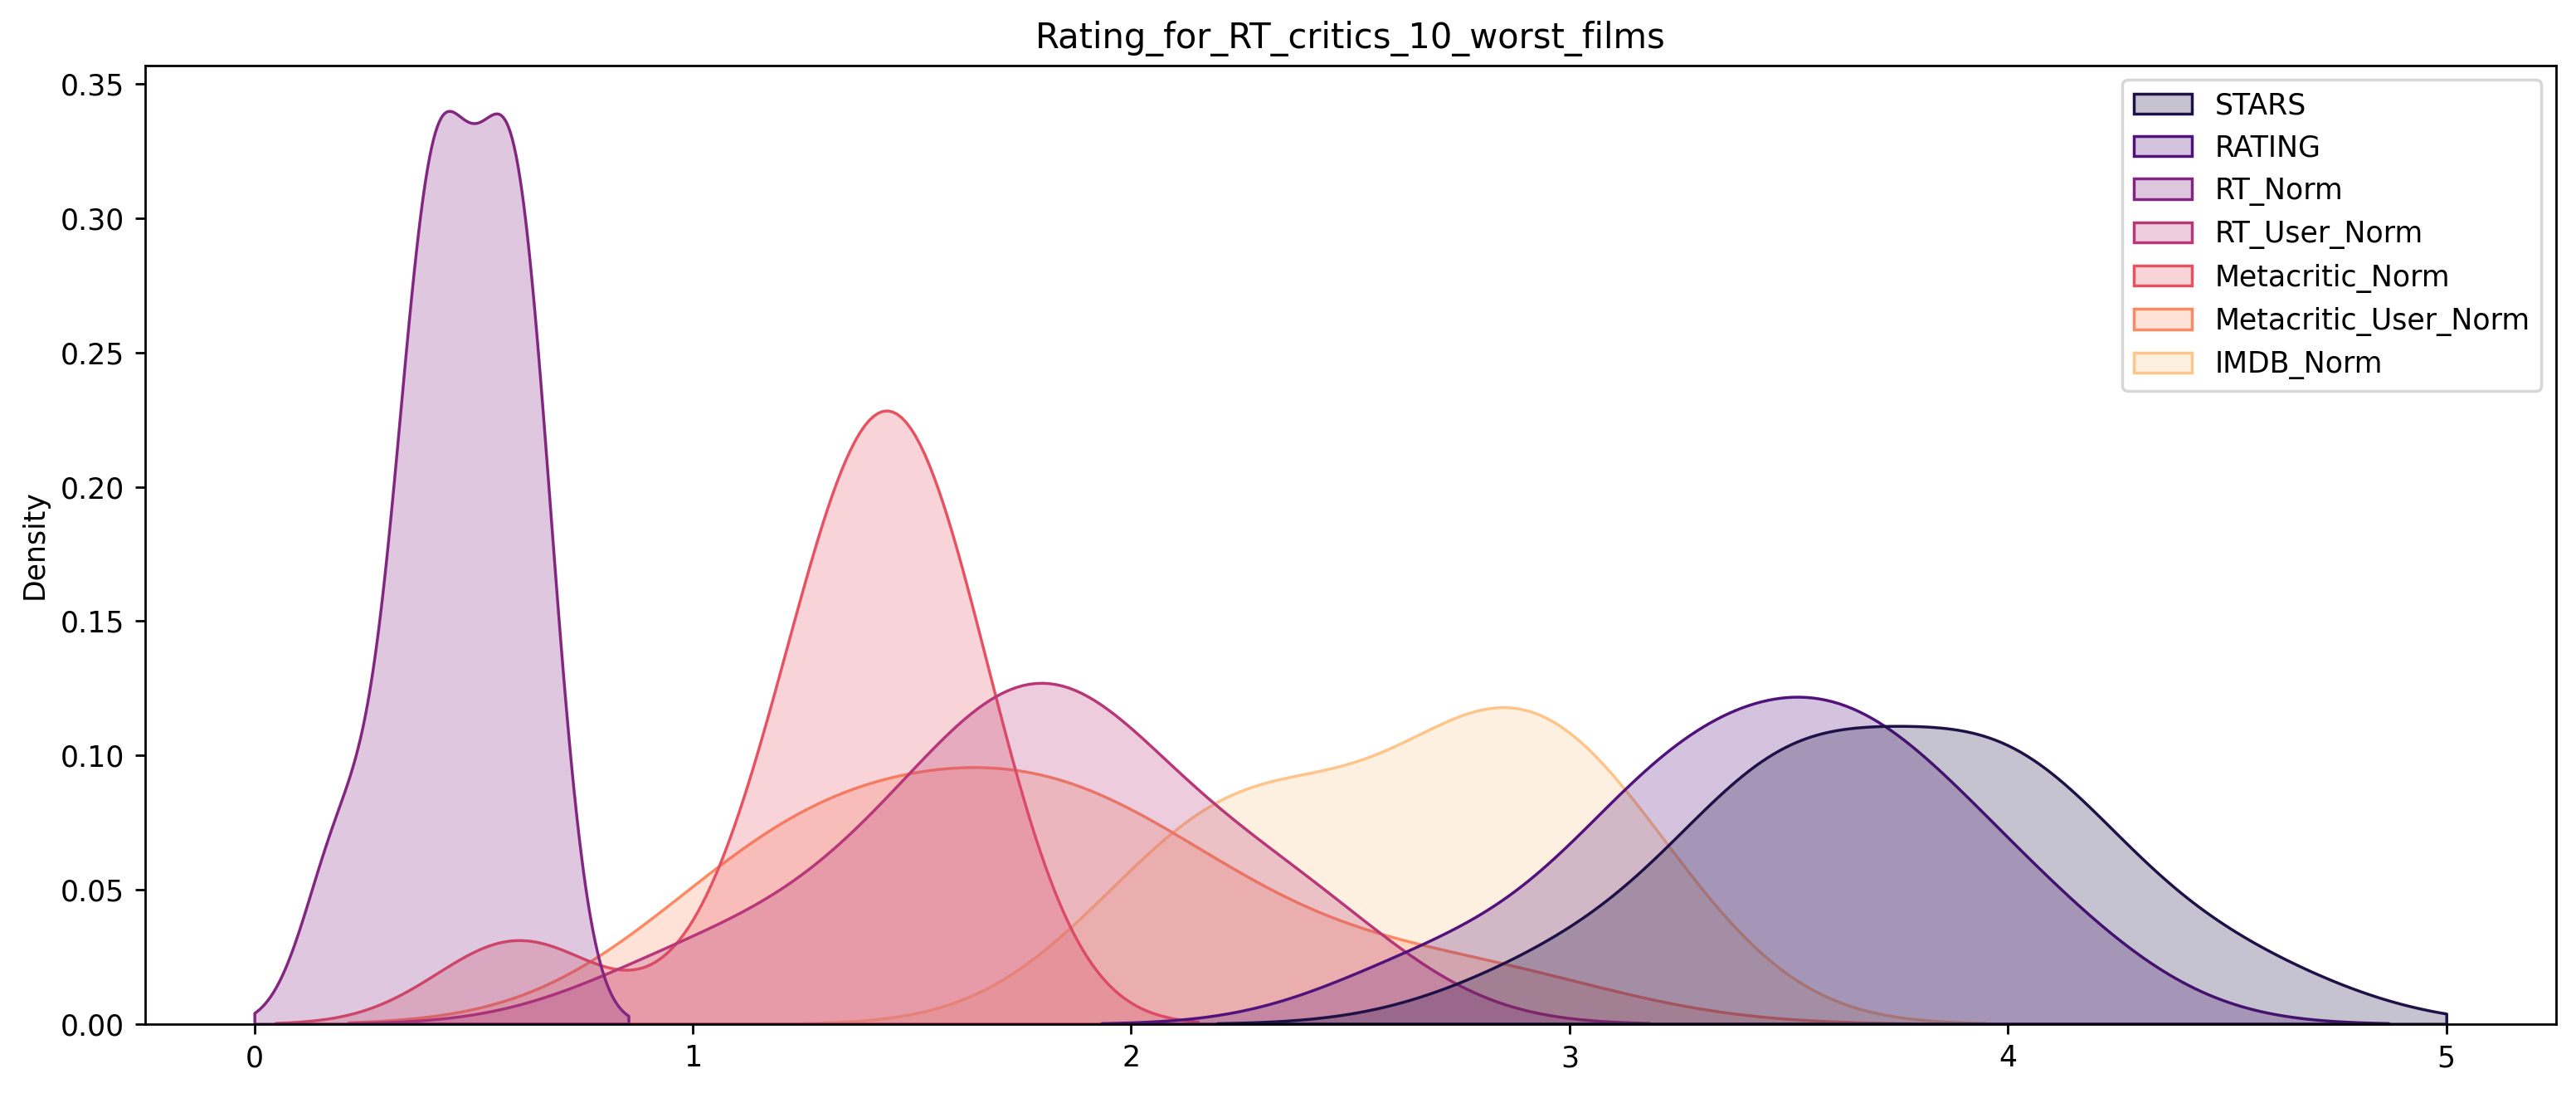

In [108]:
plt.figure(figsize=(15,6),
           dpi=250)
worst_films = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis=1)
sns.kdeplot(data=worst_films, palette='magma', clip=[0,5], shade=True)
plt.title('Rating_for_RT_critics_10_worst_films')

In [109]:
norm_films[norm_films['FILM'] == 'Taken 3 (2015)']

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
15,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0


In [112]:
print(f"Summary. \nTrue Raiting: {(0.4 + 2.3 + 1.3 + 2.3 + 3.0) / 5} but showed 4.5")

Summary. 
True Raiting: 1.86 but showed 4.5
